In [1]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime, date


In [2]:
#import dataset
with pd.ExcelFile(r'C:\Users\Victordanok\Desktop\Projects\Customer Segmentation\KPMG_VI_New_raw_data_update_final.xlsx') as reader:
    trans = pd.read_excel(reader, sheet_name = 'Transactions', header = 1)
    ncl = pd.read_excel(reader, sheet_name = 'NewCustomerList', header = 1)
    cdem = pd.read_excel(reader, sheet_name = 'CustomerDemographic', header = 1)
    cadd = pd.read_excel(reader, sheet_name = 'CustomerAddress', header = 1)

## Customer demographic dataset

In [3]:
cdem.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [4]:
#calculate the age from DOB

import datetime as dt
today = dt.datetime.today().year
cdem['age'] = today - cdem['DOB'].dt.year


In [5]:
cdem.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
default                                  90
owns_car                                  2
tenure                                   22
age                                      56
dtype: int64

In [6]:
cdem.gender.value_counts()

Female    2037
Male      1872
U           88
Femal        1
F            1
M            1
Name: gender, dtype: int64

In [7]:
#replacing

cdem['gender'].replace(to_replace =['M','F','Femal'], value =['Male', 'Female', 'Female'], inplace = True)

In [8]:
cdem.gender.value_counts()

Female    2039
Male      1873
U           88
Name: gender, dtype: int64

In [9]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [10]:
passed_on = cdem[cdem['deceased_indicator'] == 'Y'].index

In [11]:
cdem.drop(passed_on, inplace = True)

In [12]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3873 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3911 non-null   datetime64[ns]
 6   job_title                            3492 non-null   object        
 7   job_industry_category                3342 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   deceased_indicator                   3998 non-null   object        
 10  default     

<AxesSubplot:>

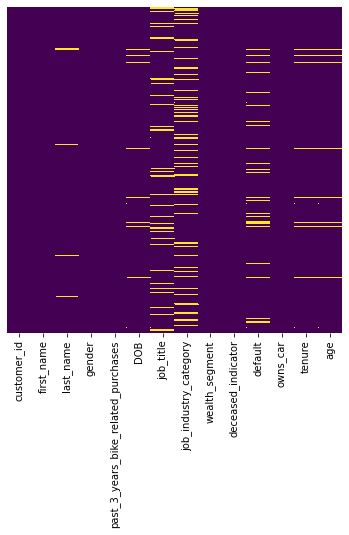

In [13]:
#check for null values
plt.figure(figsize=(6, 6))
sns.heatmap(cdem.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [14]:
#fill in the null values

cdem['age'] = cdem['age'].fillna(cdem.age.mode()[0])
cdem['tenure'] = cdem['tenure'].fillna(cdem.tenure.mode()[0])

In [15]:
cdem.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                   0
age                                      0
dtype: int64

In [16]:
cdem.drop(['default', 'last_name', 'DOB'], axis = 1, inplace = True)

In [17]:
cdem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3998 non-null   int64  
 1   first_name                           3998 non-null   object 
 2   gender                               3998 non-null   object 
 3   past_3_years_bike_related_purchases  3998 non-null   int64  
 4   job_title                            3492 non-null   object 
 5   job_industry_category                3342 non-null   object 
 6   wealth_segment                       3998 non-null   object 
 7   deceased_indicator                   3998 non-null   object 
 8   owns_car                             3998 non-null   object 
 9   tenure                               3998 non-null   float64
 10  age                                  3998 non-null   float64
dtypes: float64(2), int64(2), objec

## Customer Address dataset

In [18]:
cadd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [19]:
cadd.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [20]:
#check for the number of unique entries
cadd.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [21]:
cadd.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [22]:
#adding up the duplicated info
cadd.replace(to_replace = ['New South Wales', 'Victoria'], value = ['NSW', 'VIC'], inplace = True)

In [23]:
#check the replaced value count
cadd.state.value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

<AxesSubplot:>

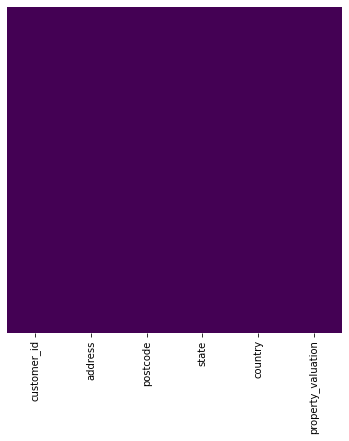

In [24]:
#heatmap showing null values

plt.figure(figsize=(6, 6))
sns.heatmap(cadd.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

## Transactions Dataset

In [25]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [26]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [27]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [28]:
trans['profit'] = trans.list_price -trans.standard_cost

In [29]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [30]:
trans.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10,1055.82


<AxesSubplot:>

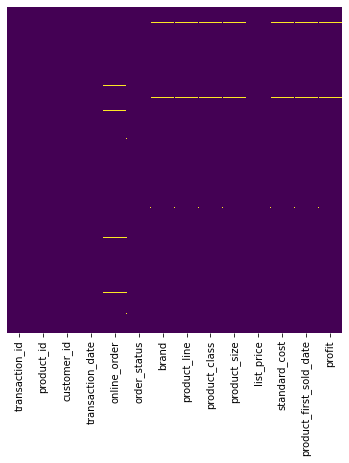

In [31]:
#heatmap showing null values

plt.figure(figsize=(6, 6))
sns.heatmap(trans.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [32]:
trans.dropna(axis = 0, inplace =  True)

In [33]:
trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

## New Customers List

In [34]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [35]:
#create an age column

#calculate the age from DOB

import datetime as dt
today = dt.datetime.today().year
ncl['age'] = today - ncl['DOB'].dt.year


In [36]:
ncl['age'] = ncl['age'].fillna(ncl.age.mode()[0])

In [37]:
ncl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [38]:
ncl.gender.value_counts()

Female    513
Male      470
U          17
Name: gender, dtype: int64

<AxesSubplot:>

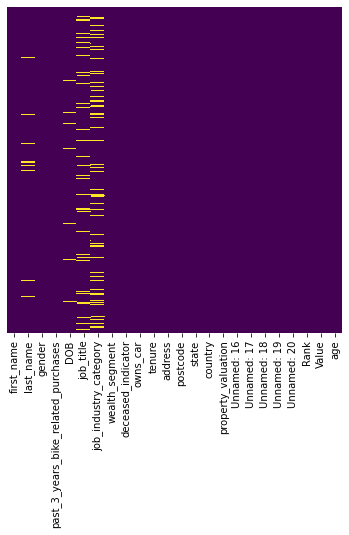

In [39]:
#heatmap showing null values

plt.figure(figsize=(6, 6))
sns.heatmap(ncl.isna(), yticklabels = False, cbar = False, cmap = 'viridis')

In [40]:
ncl.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             189
Unnamed: 19                             323
Unnamed: 20                             324
Rank                                    324
Value                           

In [41]:
ncl.drop(['Unnamed: 20'], axis = 1, inplace = True)

## Creating the customers dataset

In [42]:
add_dem = pd.merge(cdem, cadd, on = 'customer_id', how = 'left')

In [43]:
customers = pd.merge(add_dem, trans, on = 'customer_id', how = 'left')

In [44]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 19941
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19942 non-null  int64         
 1   first_name                           19942 non-null  object        
 2   gender                               19942 non-null  object        
 3   past_3_years_bike_related_purchases  19942 non-null  int64         
 4   job_title                            17543 non-null  object        
 5   job_industry_category                16712 non-null  object        
 6   wealth_segment                       19942 non-null  object        
 7   deceased_indicator                   19942 non-null  object        
 8   owns_car                             19942 non-null  object        
 9   tenure                               19942 non-null  float64       
 10  age       

In [45]:
customers.customer_id.nunique()

3998

In [46]:
customers.transaction_date.max()

Timestamp('2017-12-30 00:00:00')

In [47]:
customers.transaction_date.isna().sum()

508

In [48]:
customers['recency'] = customers.transaction_date.max() - customers.transaction_date

In [49]:
customers.head()

,customer_id,first_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,...,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit,recency
0,1,Laraine,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,2005-05-10,110.56,7 days
1,1,Laraine,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,Approved,Solex,Standard,medium,medium,1577.53,826.51,2008-03-19,751.02,268 days
2,1,Laraine,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,2003-07-21,189.28,233 days
3,1,Laraine,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,Approved,Norco Bicycles,Standard,medium,medium,360.40,270.30,2003-09-09,90.10,359 days
4,1,Laraine,Female,93,Executive Secretary,Health,Mass Customer,N,Yes,11.0,...,Approved,Solex,Standard,medium,medium,71.49,53.62,2005-08-09,17.87,312 days


In [50]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 19941
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype          
---  ------                               --------------  -----          
 0   customer_id                          19942 non-null  int64          
 1   first_name                           19942 non-null  object         
 2   gender                               19942 non-null  object         
 3   past_3_years_bike_related_purchases  19942 non-null  int64          
 4   job_title                            17543 non-null  object         
 5   job_industry_category                16712 non-null  object         
 6   wealth_segment                       19942 non-null  object         
 7   deceased_indicator                   19942 non-null  object         
 8   owns_car                             19942 non-null  object         
 9   tenure                               19942 non-null  float64        
 10

In [52]:
test = pd.DataFrame(customers, columns = ['customer_id', 'recency', 'product_id', 'profit'])

In [53]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19942 entries, 0 to 19941
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   customer_id  19942 non-null  int64          
 1   recency      19434 non-null  timedelta64[ns]
 2   product_id   19434 non-null  float64        
 3   profit       19434 non-null  float64        
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 779.0 KB


In [54]:
test.isna().sum()

customer_id      0
recency        508
product_id     508
profit         508
dtype: int64

In [55]:
test.nunique()

customer_id    3998
recency         364
product_id      101
profit          100
dtype: int64

In [58]:
test.dropna(axis = 0, inplace = True)

In [60]:
test.isna().sum()

customer_id    0
recency        0
product_id     0
profit         0
dtype: int64

In [61]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19434 entries, 0 to 19442
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   customer_id  19434 non-null  int64          
 1   recency      19434 non-null  timedelta64[ns]
 2   product_id   19434 non-null  float64        
 3   profit       19434 non-null  float64        
dtypes: float64(2), int64(1), timedelta64[ns](1)
memory usage: 759.1 KB


In [98]:
#convert recency to str
test['recency'] = test.recency.astype(str)
#remove the days
test['recency'] = test.recency.str.replace('days', '')

#convert back to integers
test['recency'] = test.recency.astype(int)

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19434 entries, 0 to 19442
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  19434 non-null  int64  
 1   recency      19434 non-null  int32  
 2   product_id   19434 non-null  float64
 3   profit       19434 non-null  float64
dtypes: float64(2), int32(1), int64(1)
memory usage: 683.2 KB


In [103]:
def r_score(days):
    """Function to determine R-score of customers who purchased recently
        the higher the value of the R score, the more recent they patronized
    """
    if days >= 88:
        return 1
    elif days <= 88 and days >= 45:
        return 2
    elif days <= 45 and days >= 18:
        return 3
    else:
        return 4

In [102]:
test['r_score'] = test['recency'].apply(r_score)